# Laboratorio #2

### Problema #1:
Desarrolle una funcion que dada una imagen en escala de grises muestre dicha imagen en 3 dimensiones, donde los ejes X e Y representan el dominio espacial de la imagen y Z representa la intensidad del color gris de cada pixel.

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

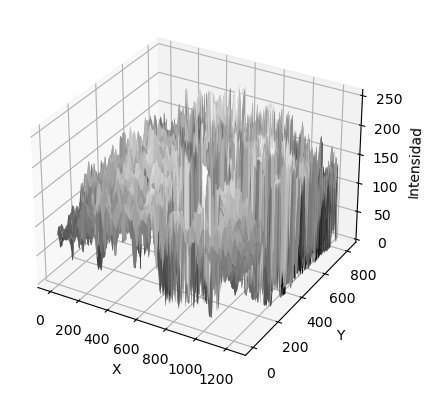

In [63]:
def imagen_tres_dimensiones(image):
    rows, cols = image.shape
    x = np.arange(0, cols, 1)
    y = np.arange(0, rows, 1)
    X, Y = np.meshgrid(x, y)
    Z = image
    
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(X, Y, Z, cmap='gray', edgecolor='none')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Intensidad')
    
    plt.show()

# Cargar una imagen en escala de grises
gray_image = cv2.imread("C:/Users/Jose L/Documents/Phyton scripts/Text Mining/Lab#2/imagen_gris.png", cv2.IMREAD_GRAYSCALE)

# Mostrar la imagen en 3D
imagen_tres_dimensiones(gray_image)


### Problema #2:
Implemente una funcion para cada una de las transformaciones vistas en clase: negativa, lineal, logarıtmica y exponencial.


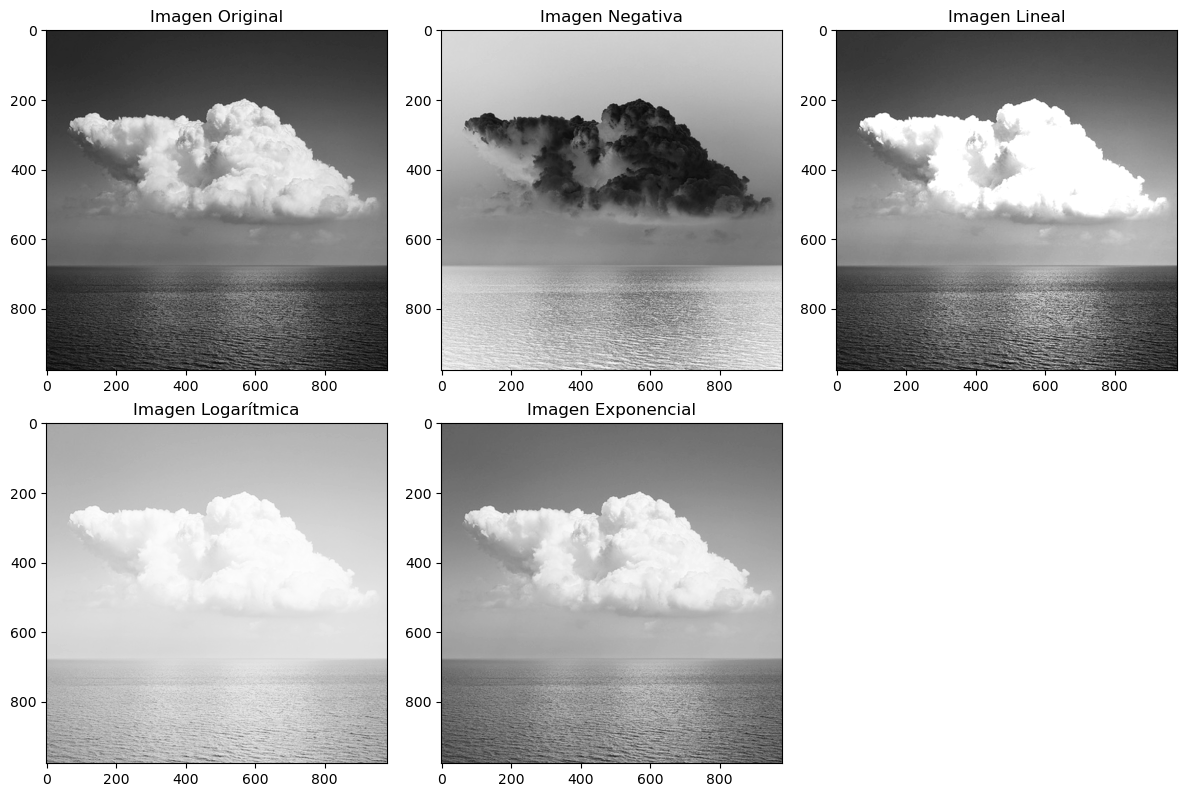

In [65]:
def Transformacion_negativa(image): #Transformacion negativa
    imagen_negativa = 255 - image
    return imagen_negativa

def Transformacion_lineal(image, alpha, beta): #Transformacion lineal
    imagen_lineal = cv2.convertScaleAbs(image, alpha=alpha, beta=beta)
    return imagen_lineal

def Transformacion_logaritmica(image, c): #Transformacion logaritmica
    imagen_logaritmica = c * np.log1p(image).astype('float32') 
    imagen_logaritmica = cv2.normalize(log_transformed_image, None, 0, 255, cv2.NORM_MINMAX, dtype=cv2.CV_8U)
    return imagen_logaritmica

def Transformacion_exponencial(image, gamma): #Transformacion exponencial
    imagen_exponencial = np.power(image, gamma)
    imagen_exponencial = cv2.normalize(exponential_image, None, 0, 255, cv2.NORM_MINMAX, dtype=cv2.CV_8U)
    return imagen_exponencial

gray_image = cv2.imread("C:/Users/Jose L/Documents/Phyton scripts/Text Mining/Lab#2/imagen2.png", cv2.IMREAD_GRAYSCALE) # Cargar imagen en escala de grises

# Aplicar transformaciones a la imagen
imagen_negativa = Transformacion_negativa(gray_image)
imagen_lineal = Transformacion_lineal(gray_image, alpha=1.2, beta=30)
imagen_logaritmica = Transformacion_logaritmica(gray_image, c=255/np.log1p(np.max(gray_image))) 
imagen_exponencial = Transformacion_exponencial(gray_image, gamma=0.5)

plt.figure(figsize=(12, 8))

#Grafica de imagen original
plt.subplot(2, 3, 1)
plt.imshow(gray_image, cmap='gray')
plt.title('Imagen Original') 

#Grafica de imagen negativa
plt.subplot(2, 3, 2)
plt.imshow(negative_image, cmap='gray')
plt.title('Imagen Negativa')

#Grafica de imagen Lineal
plt.subplot(2, 3, 3)
plt.imshow(linear_image, cmap='gray')
plt.title('Imagen Lineal')

#Grafica de imagen Logarítmica
plt.subplot(2, 3, 4)
plt.imshow(log_transformed_image, cmap='gray')
plt.title('Imagen Logarítmica')

#Grafica de imagen Exponencial
plt.subplot(2, 3, 5)
plt.imshow(exponential_image, cmap='gray')
plt.title('Imagen Exponencial')

plt.tight_layout()
plt.show()


### Problema #3:
Desarrolle una funcion que dada dos imagenes a color, realice las operaciones SUMA, RESTA, AND, OR , XOR con ambas imagenes recuerde que para realizar las operaciones logicas es necesario pasar la imagen a escala de grises y luego binarizarla.

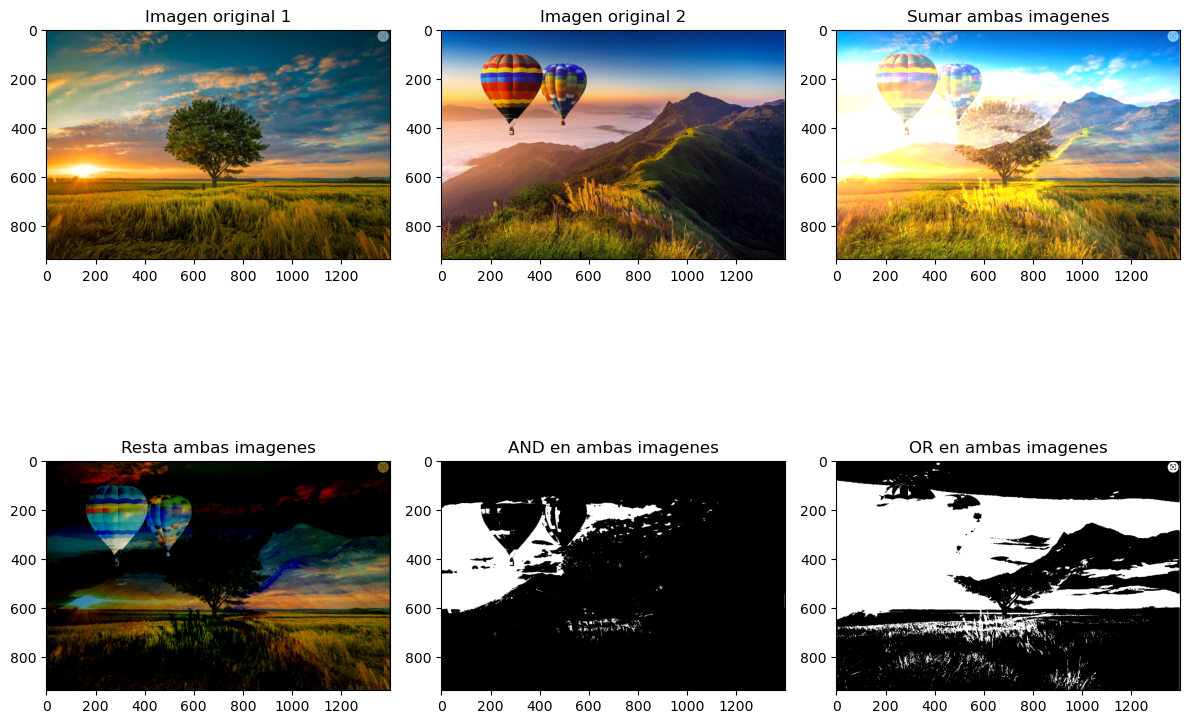

In [68]:
def multiples_operaciones(image1, image2):
    imagen_gris1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY) #Convertir imágenes a escala de grises
    imagen_gris2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)
    _, binarized_image1 = cv2.threshold(imagen_gris1, 128, 255, cv2.THRESH_BINARY) #Binarizar imágenes
    _, binarized_image2 = cv2.threshold(imagen_gris2, 128, 255, cv2.THRESH_BINARY)

    height, width, _ = image1.shape #Redimensionar ambas imágenes iguales
    image2_resized = cv2.resize(image2, (width, height))

    sum_result = cv2.add(imagen1, image2_resized) # Realizar operaciones lógicas
    subtract_result = cv2.subtract(imagen1, image2_resized)
    and_result = cv2.bitwise_and(binarized_image1, binarized_image2)
    or_result = cv2.bitwise_or(binarized_image1, binarized_image2)
    xor_result = cv2.bitwise_xor(binarized_image1, binarized_image2)
    
    return sum_result, subtract_result, and_result, or_result, xor_result


imagen1 = cv2.imread("C:/Users/Jose L/Documents/Phyton scripts/Text Mining/Lab#2/Imagen_color1.png") #Cargar imágenes a color
imagen2 = cv2.imread("C:/Users/Jose L/Documents/Phyton scripts/Text Mining/Lab#2/Imagen_color2.png")

sum_result, subtract_result, and_result, or_result, xor_result = multiples_operaciones(image1, image2) #Realizar operaciones entre las imágenes

plt.figure(figsize=(12, 10))

plt.subplot(2, 3, 1)
plt.imshow(cv2.cvtColor(image1, cv2.COLOR_BGR2RGB))
plt.title('Imagen original 1')

plt.subplot(2, 3, 2)
plt.imshow(cv2.cvtColor(image2, cv2.COLOR_BGR2RGB))
plt.title('Imagen original 2')

plt.subplot(2, 3, 3)
plt.imshow(cv2.cvtColor(sum_result, cv2.COLOR_BGR2RGB))
plt.title('Sumar ambas imagenes')

plt.subplot(2, 3, 4)
plt.imshow(cv2.cvtColor(subtract_result, cv2.COLOR_BGR2RGB))
plt.title('Resta ambas imagenes')

plt.subplot(2, 3, 5)
plt.imshow(and_result, cmap='gray')
plt.title('AND en ambas imagenes')

plt.subplot(2, 3, 6)
plt.imshow(or_result, cmap='gray')
plt.title('OR en ambas imagenes')

plt.tight_layout()
plt.show()


### Problema #4:
Realice una comparacion entre el algoritmo de Canny, el operador de Sobel y el operador Laplaciano para encontrar los bordes en una imagen, para este ejercicio puede utilizar las funciones de openCV y cualquier imagen, como entregable debe mostrar una comparacion entre los tres enfoques con una tabla donde se muestre las ventajas y desventajas de cada enfoque.

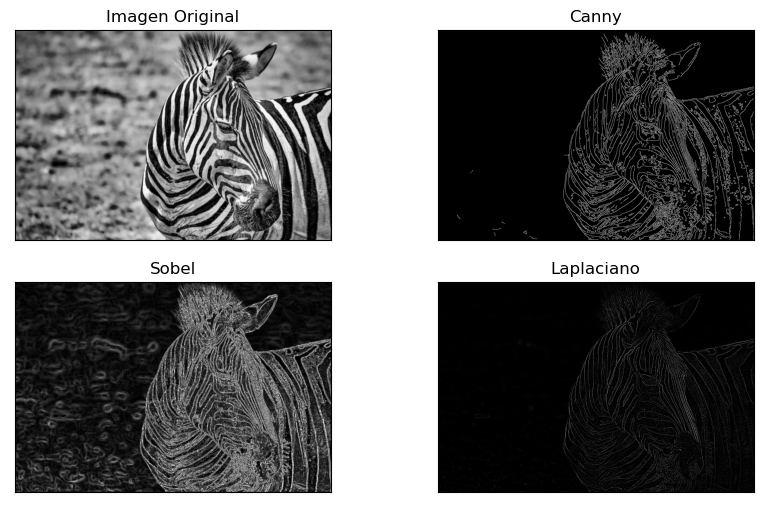

In [58]:
image4 = cv2.imread("C:/Users/Jose L/Documents/Phyton scripts/Text Mining/Lab#2/Imagen_gris.png", cv2.IMREAD_GRAYSCALE) # Cargar imagen gris

canny_edges = cv2.Canny(image4, threshold1=100, threshold2=200) #Aplicar algoritmo de Canny
sobelx = cv2.Sobel(image4, cv2.CV_64F, 1, 0, ksize=3) # Aplicar operador Sobel
sobely = cv2.Sobel(image4, cv2.CV_64F, 0, 1, ksize=3)
sobel_edges = np.sqrt(sobelx**2 + sobely**2).astype(np.uint8)
laplacian_edges = cv2.Laplacian(image4, cv2.CV_8U) # Aplicar operador Laplaciano


plt.figure(figsize=(10, 6))

plt.subplot(2, 2, 1), plt.imshow(image4, cmap='gray') #Imagen Original
plt.title('Imagen Original'), plt.xticks([]), plt.yticks([])

plt.subplot(2, 2, 2), plt.imshow(canny_edges, cmap='gray') #Imagen Canny
plt.title('Canny'), plt.xticks([]), plt.yticks([])

plt.subplot(2, 2, 3), plt.imshow(sobel_edges, cmap='gray') #Imagen Sobel
plt.title('Sobel'), plt.xticks([]), plt.yticks([])

plt.subplot(2, 2, 4), plt.imshow(laplacian_edges, cmap='gray') #Imagen Laplaciano
plt.title('Laplaciano'), plt.xticks([]), plt.yticks([])
plt.show()


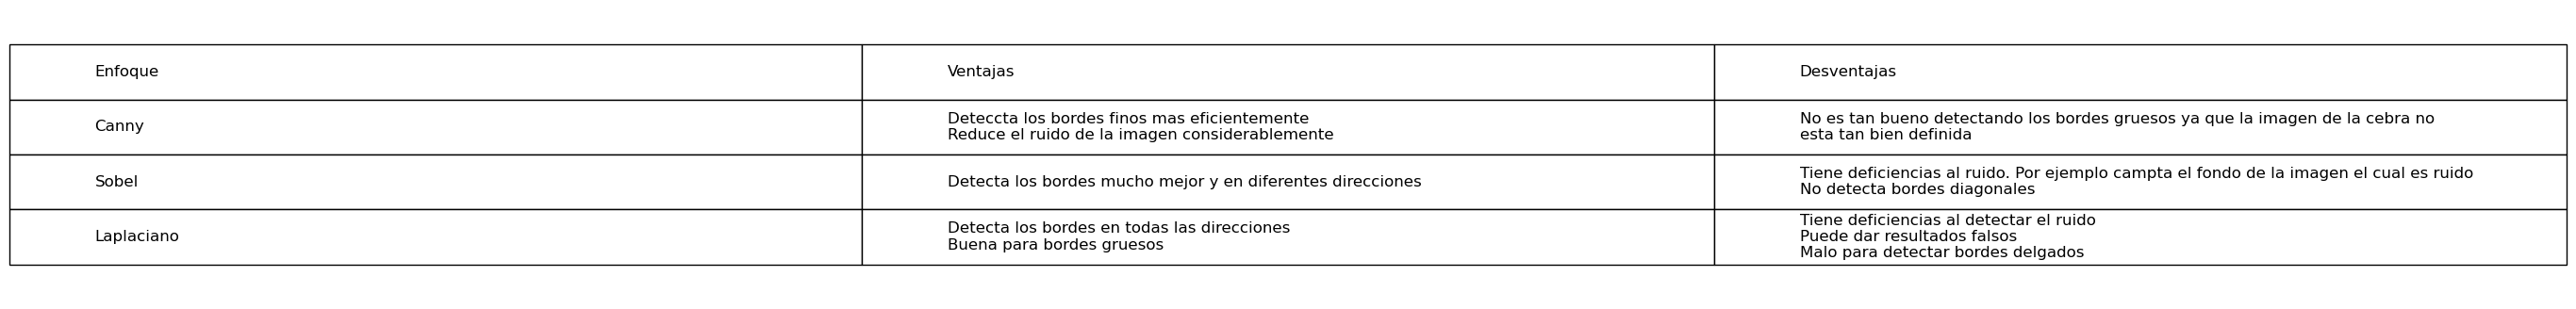

In [86]:
table_data = [
    ["Enfoque", "Ventajas", "Desventajas"],
    ["Canny", "Deteccta los bordes finos mas eficientemente\nReduce el ruido de la imagen considerablemente", "No es tan bueno detectando los bordes gruesos ya que la imagen de la cebra no \nesta tan bien definida"],
    ["Sobel", "Detecta los bordes mucho mejor y en diferentes direcciones", "Tiene deficiencias al ruido. Por ejemplo campta el fondo de la imagen el cual es ruido\nNo detecta bordes diagonales"],
    ["Laplaciano", "Detecta los bordes en todas las direcciones\nBuena para bordes gruesos", "Tiene deficiencias al detectar el ruido\nPuede dar resultados falsos\nMalo para detectar bordes delgados"]
]

fig, ax = plt.subplots(figsize=(10, 4))
ax.axis('tight')
ax.axis('off')
table = ax.table(cellText=table_data, colLabels=None, cellLoc='left', loc='center')
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(3.5,3.5)
plt.show()

### Problema #5:
Utilizando funciones de OpenCV debera aplicar los ﬁltros de convolucion de tamaño de kernel (3x3, 5x5 y 7x7) las operaciones que debera realizar son las siguientes:

* Kernel Gaussiano de ruido.
* Kernel Box de ruido.
* Kernel de mediana para ruido.
* Kernel Sobel para deteccion de bornes (en X e Y).
* Kernel Lapaciano para deteccion de bordes.
* Kernel de realce (Sharpening).
* Kernel de relieve (Embossing)

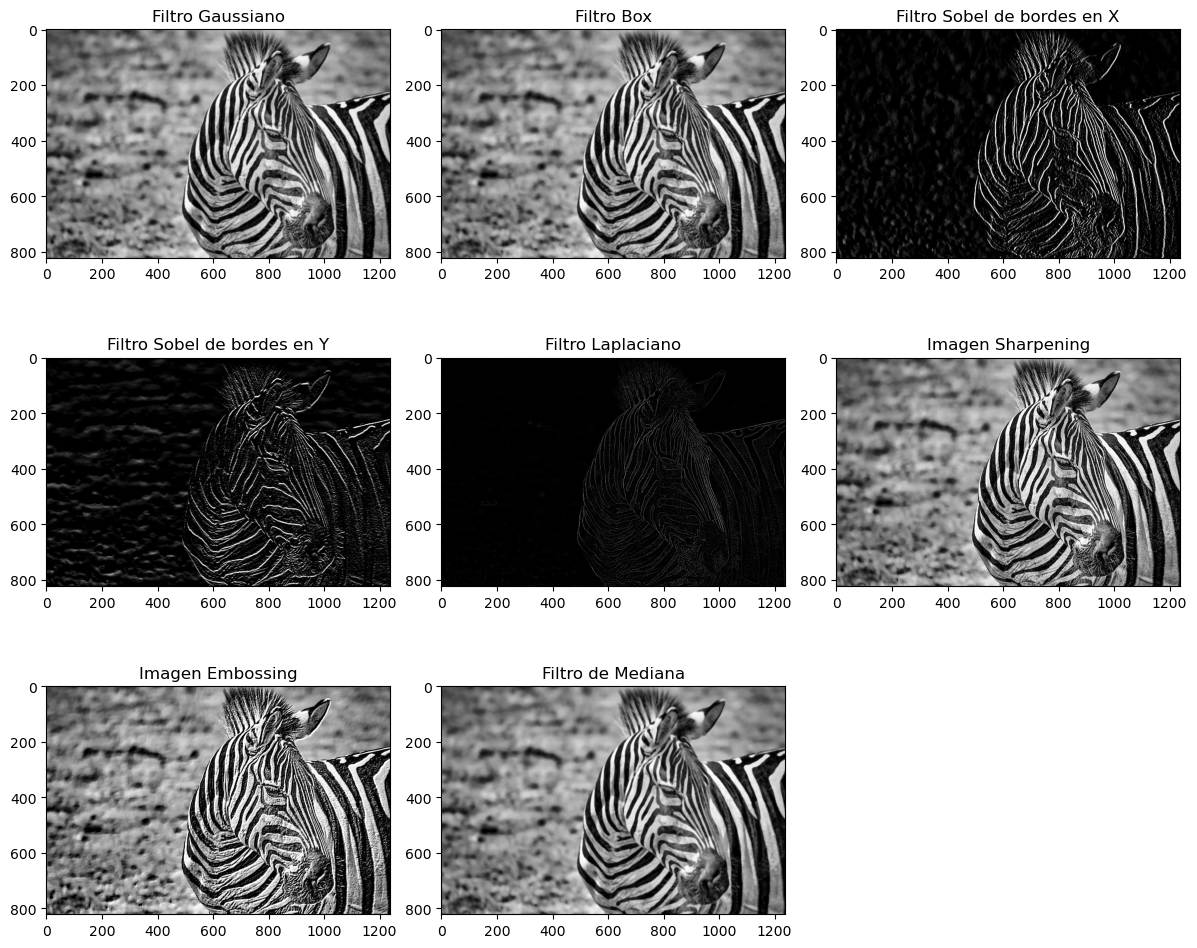

In [77]:
image5 = cv2.imread("C:/Users/Jose L/Documents/Phyton scripts/Text Mining/Lab#2/Imagen_gris.png", cv2.IMREAD_GRAYSCALE) #Cargar imagen gris

gaussian_kernel = np.array([[1, 2, 1], [2, 4, 2], [1, 2, 1]], dtype=np.float32) / 16 #Definir los diferentes kernels
box_kernel = np.ones((3, 3), dtype=np.float32) / 9
sobel_x_kernel = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]], dtype=np.float32)
sobel_y_kernel = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]], dtype=np.float32)
laplacian_kernel = np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]], dtype=np.float32)
sharpening_kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]], dtype=np.float32)
embossing_kernel = np.array([[-2, -1, 0], [-1, 1, 1], [0, 1, 2]], dtype=np.float32)


gaussian_filtered = cv2.filter2D(image5, -1, gaussian_kernel) #Aplicar los filtros
box_filtered = cv2.filter2D(image5, -1, box_kernel)
sobel_x_filtered = cv2.filter2D(image5, -1, sobel_x_kernel)
sobel_y_filtered = cv2.filter2D(image5, -1, sobel_y_kernel)
laplacian_filtered = cv2.filter2D(image5, -1, laplacian_kernel)
sharpened_image = cv2.filter2D(image5, -1, sharpening_kernel)
embossed_image = cv2.filter2D(image5, -1, embossing_kernel)
median_filtered = cv2.medianBlur(image5, 7)

plt.figure(figsize=(12, 10))

plt.subplot(3, 3, 1) #Filtro Gaussiano
plt.imshow(gaussian_filtered, cmap='gray') 
plt.title('Filtro Gaussiano')

plt.subplot(3, 3, 2) #Filtro Box
plt.imshow(box_filtered, cmap='gray')
plt.title('Filtro Box')

plt.subplot(3, 3, 3) #Filtro Sobel de bordes en X
plt.imshow(sobel_x_filtered, cmap='gray')
plt.title('Filtro Sobel de bordes en X')

plt.subplot(3, 3, 4) #Filtro Sobel de bordes en Y
plt.imshow(sobel_y_filtered, cmap='gray')
plt.title('Filtro Sobel de bordes en Y')

plt.subplot(3, 3, 5) #Filtro Laplaciano
plt.imshow(laplacian_filtered, cmap='gray')
plt.title('Filtro Laplaciano')

plt.subplot(3, 3, 6) #Filtro Sharpening
plt.imshow(sharpened_image, cmap='gray')
plt.title('Imagen Sharpening')

plt.subplot(3, 3, 7) #Filtro Embossing
plt.imshow(embossed_image, cmap='gray')
plt.title('Imagen Embossing')

plt.subplot(3, 3, 8)
plt.imshow(median_filtered, cmap='gray')
plt.title('Filtro de Mediana')

plt.tight_layout()
plt.show()
